### Step 1. Import required python packages.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM
from sklearn.preprocessing import StandardScaler
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

### Step 2. Load the dataset from the URL into a pandas DataFrame named "df".

In [3]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(URL, header=None, names=column_names)

### Step 3. Normalize the data and store the values in a NumPy array for later use in our model.

In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

### Step 4. Choose "sepal_length" and "sepal_width" for outlier detection. Split the two columns' data into features and training/test sets as 0.3 (30%).

In [14]:
X = scaled_features[:, :2]  # Using only sepal_length and sepal_width

X_train, X_test= train_test_split(X, test_size=0.3, random_state=42)

### Step 5. Randomly choose three detectors and create a classifiers dictionary, using Outliers Fraction 0.1, Random State 42.

In [6]:
random_state = 42
outliers_fraction = 0.1
classifiers = {
    'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction, n_neighbors=5),
    'Local Outlier Factor (LOF)': LOF(contamination=outliers_fraction),
    'One-Class SVM (OCSVM)': OCSVM(contamination=outliers_fraction)
}

### Step 6. Initialize and fit the three detectors from the classifiers dictionary respectively.

In [15]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X_train)

### Step 7. Predict outliers on the test set using the three detectors respectively.

In [16]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
    y_test_pred = clf.predict(X_test)
    print(f"{clf_name} - Test set predictions:{y_test_pred}")

K Nearest Neighbors (KNN) - Test set predictions:[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0]
Local Outlier Factor (LOF) - Test set predictions:[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0]
One-Class SVM (OCSVM) - Test set predictions:[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 0]


### Step 8. Evaluate the prediction using ROC and Precision on training data and test data.

In [22]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores
    print(f"Training Data Evaluation for {clf_name}")
    evaluate_print(clf_name, y_train_pred, y_train_scores)
    
    y_test_scores = clf.decision_function(X_test)  # outlier scores
    print(f"Test Data Evaluation for {clf_name}")
    evaluate_print(clf_name, y_test_pred, y_test_scores)

Training Data Evaluation for K Nearest Neighbors (KNN)
K Nearest Neighbors (KNN) ROC:1.0, precision @ rank n:1.0
Test Data Evaluation for K Nearest Neighbors (KNN)
K Nearest Neighbors (KNN) ROC:0.9829, precision @ rank n:0.8333
Training Data Evaluation for Local Outlier Factor (LOF)
Local Outlier Factor (LOF) ROC:1.0, precision @ rank n:1.0
Test Data Evaluation for Local Outlier Factor (LOF)
Local Outlier Factor (LOF) ROC:0.9957, precision @ rank n:0.8333
Training Data Evaluation for One-Class SVM (OCSVM)
One-Class SVM (OCSVM) ROC:1.0, precision @ rank n:1.0
Test Data Evaluation for One-Class SVM (OCSVM)
One-Class SVM (OCSVM) ROC:1.0, precision @ rank n:1.0


### Step 9. Visualize the outlier scores by visualize function for the three detectors respectively.

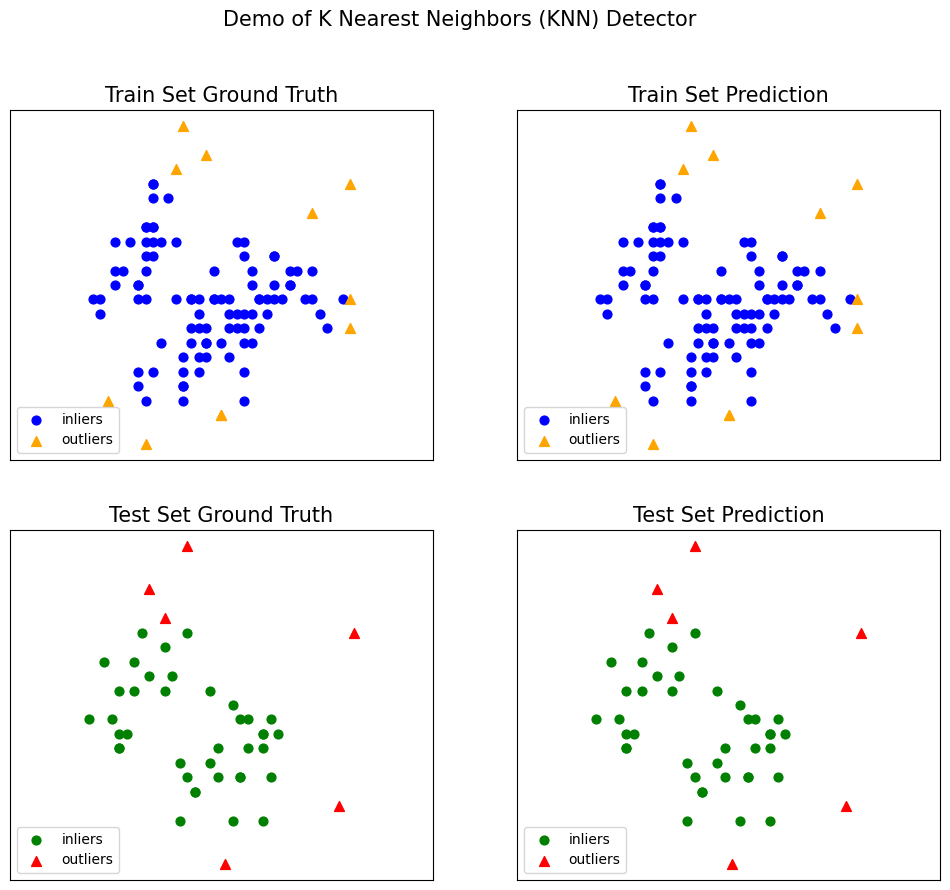

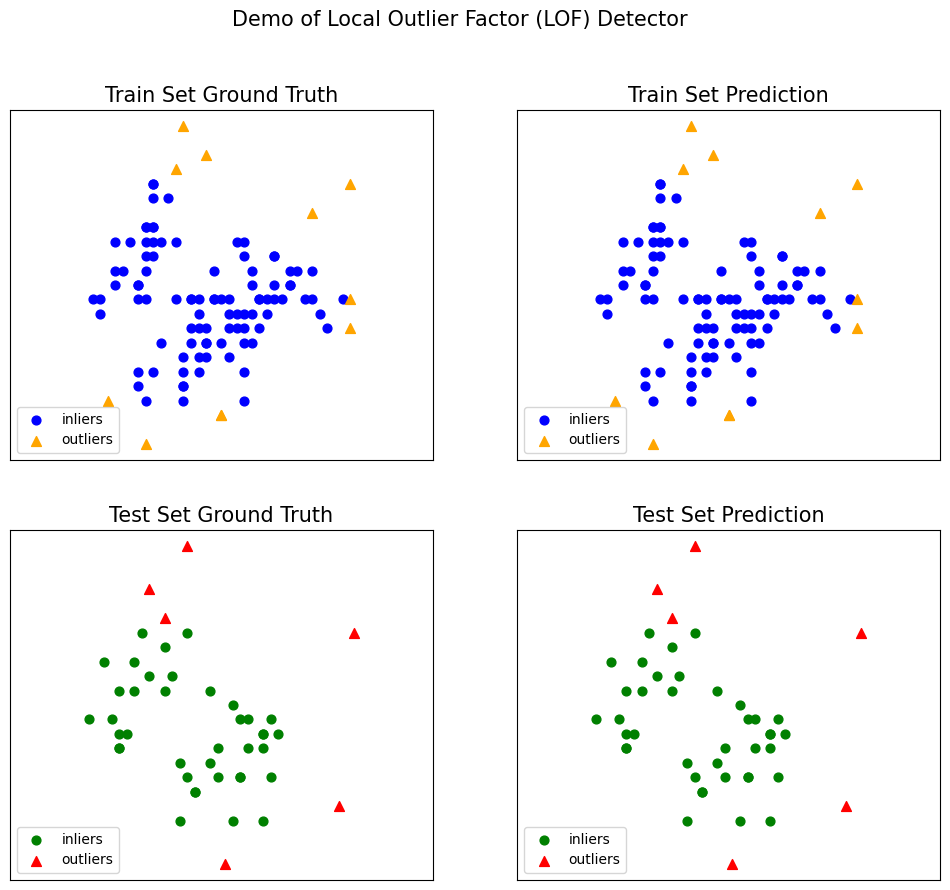

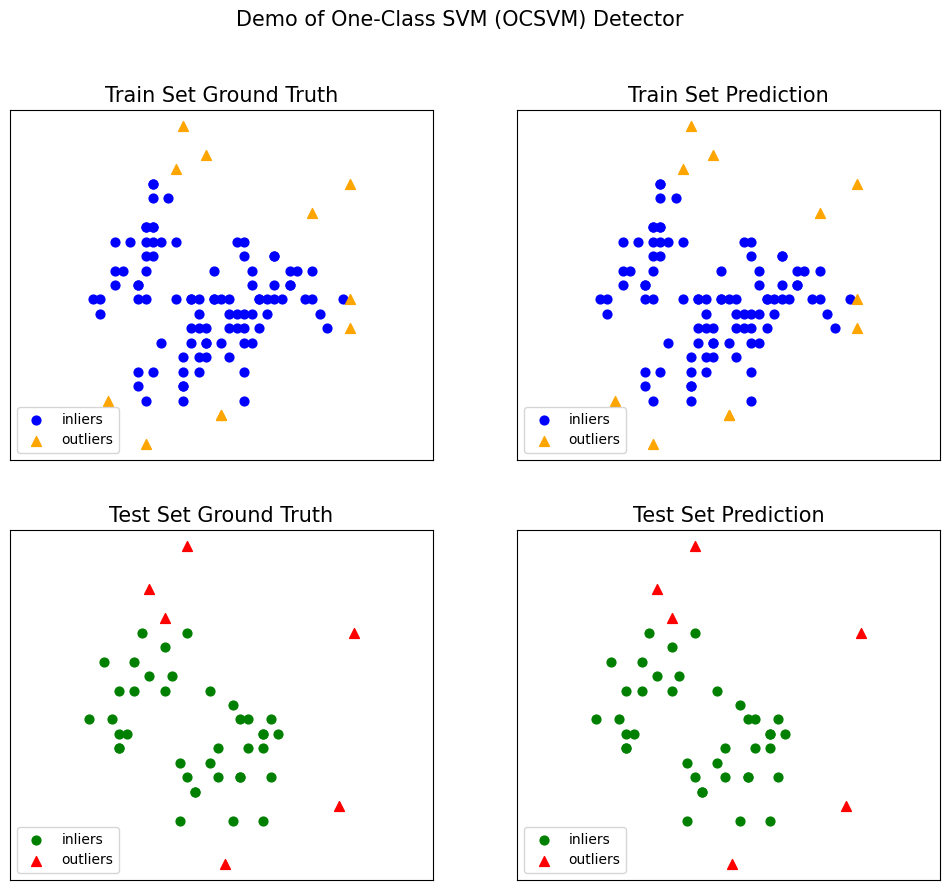

In [21]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
    visualize(clf_name, X_train, y_train_pred, X_test, y_test_pred, y_train_pred, y_test_pred, show_figure=True)